# Flood prediction Model

In [2]:
#Import some basic libraries
import numpy as np
import pandas as pd

# Data Insight

In [3]:
#Read the data present in dataset
data = pd.read_csv('kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [5]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [6]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [7]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


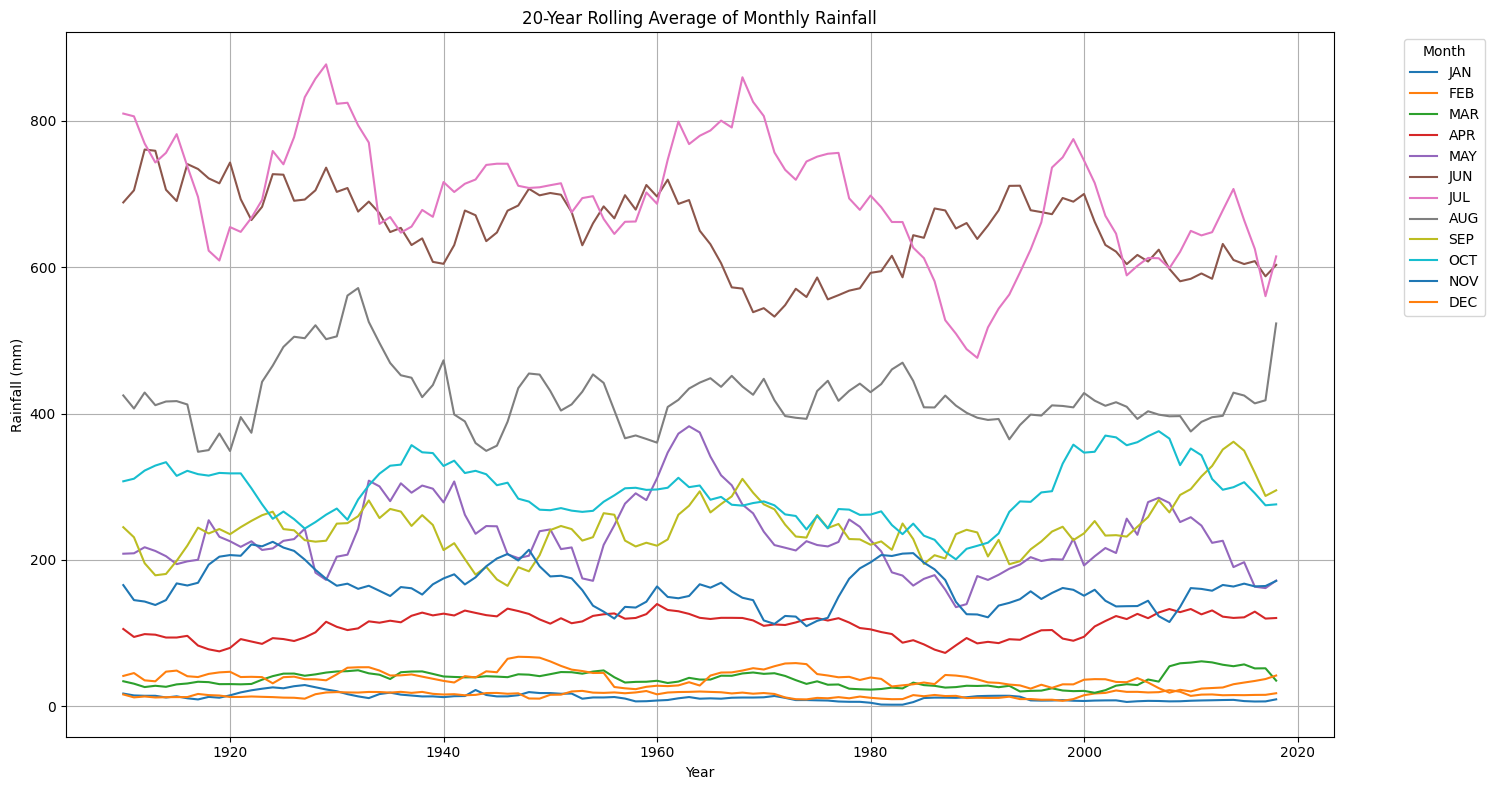

In [12]:
import matplotlib.pyplot as plt

# Assuming 'x' is your DataFrame and it has a column named 'YEAR'
# First, check if 'YEAR' is a column or an index
if 'YEAR' in x.columns:
    x = x.set_index('YEAR')

# Calculating rolling averages with a window size of 10 years
rolling_avg = x.rolling(window=10).mean()

# Plotting
plt.figure(figsize=(15, 8))
for month in rolling_avg.columns:
    plt.plot(rolling_avg.index, rolling_avg[month], label=month)

plt.title('20-Year Rolling Average of Monthly Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

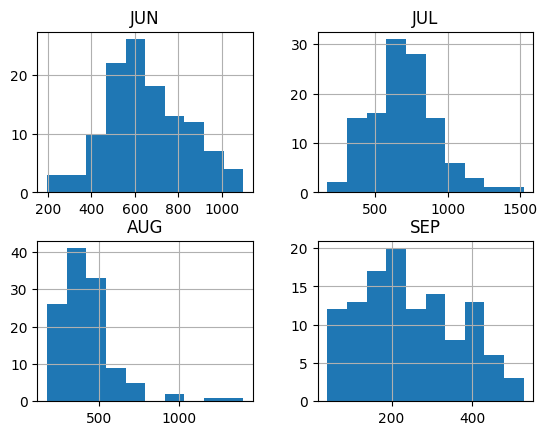

In [13]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [14]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [15]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
86,1987,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,157.0,272.1,216.0,131.1
49,1950,0.1,53.7,31.1,68.5,242.0,638.3,905.7,387.3,411.6,250.4,149.2,8.8
89,1990,14.9,4.8,18.0,41.8,488.5,528.6,635.4,370.8,103.3,323.2,158.8,5.2
81,1982,0.7,0.1,21.9,60.4,148.2,612.2,511.5,495.0,70.6,164.4,127.5,10.8
54,1955,4.2,6.3,28.2,125.9,544.2,782.4,392.8,236.0,438.5,378.2,178.1,19.8


In [17]:
y_train.head()

86    0
49    1
89    0
81    0
54    1
Name: FLOODS, dtype: int64

# Prediction Algorithms:

# 1. KNN Classifier

In [18]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [19]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1]


In [20]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
18     1
111    0
98     0
117    1
68     0
33     0
7      0
67     1
58     1
106    1
47     1
69     0
77     1
46     1
16     0
43     0
61     1
79     0
70     1
63     0
41     1
53     1
84     0
35     1
Name: FLOODS, dtype: int64


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [23]:
knn_accuracy.mean()

0.5416666666666666

# 2. Logistic Regression

In [24]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [26]:
lr_accuracy.mean()

0.5416666666666666

In [27]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1]


In [28]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1]


In [29]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 79.166667
recall score: 76.923077
roc score: 79.370629


# 3. Decision tree classification

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.65625   , 0.77419355, 0.67741935])

In [31]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0]


In [32]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1]


In [33]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:75.000000
recall score:76.923077
roc score:74.825175


# 4. Random Forest Classification

In [34]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [35]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [36]:
rmf_clf_acc

array([0.75      , 0.83870968, 0.87096774])

In [37]:
y_pred = rmf_clf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:79.166667
recall score:92.307692
roc score:77.972028


# 5. Enseble Learning

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [40]:
voting_clf = voting.fit(x_train, y_train)

In [41]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9583333333333334
RandomForestClassifier 0.875
KNeighborsClassifier 0.875
VotingClassifier 0.875


# Comparing all the prediction models

In [42]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

d:\Hackathons\rubix24_Ctrl-c-ctrl-v\backend\virtual_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.875000
1   LR  0.958333
2   DT  0.750000
3   RF  0.875000
4   EL  0.875000


In [43]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 18 to 35
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    24 non-null     int64  
 1   JAN     24 non-null     float64
 2   FEB     24 non-null     float64
 3   MAR     24 non-null     float64
 4   APR     24 non-null     float64
 5   MAY     24 non-null     float64
 6   JUN     24 non-null     float64
 7   JUL     24 non-null     float64
 8   AUG     24 non-null     float64
 9   SEP     24 non-null     float64
 10  OCT     24 non-null     float64
 11  NOV     24 non-null     float64
 12  DEC     24 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 2.6 KB


C:\Users\meetp\AppData\Local\Temp\ipykernel_21880\3500895668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='Name', y='Score', data=tr_split, palette="viridis")  # Using a different color palette


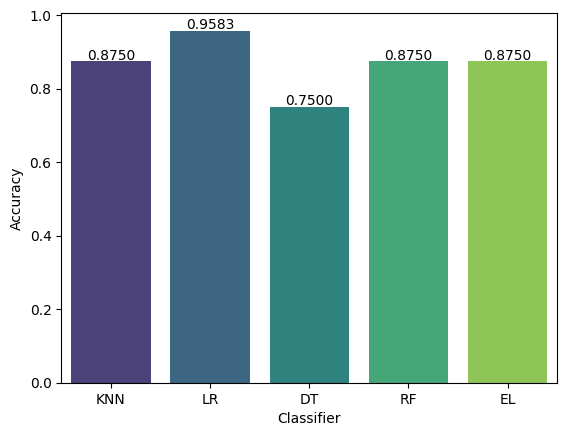

In [46]:
import seaborn as sns

axis = sns.barplot(x='Name', y='Score', data=tr_split, palette="viridis")  # Using a different color palette

# Setting labels
axis.set(xlabel='Classifier', ylabel='Accuracy')

# Adding the text on top of the bars
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2., height + 0.005, '{:1.4f}'.format(height), ha="center") 

plt.show()

In [47]:
models

[('KNN', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier()),
 ('EL',
  VotingClassifier(estimators=[('lr',
                                LogisticRegression(random_state=42,
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier())]))]

In [48]:
from joblib import dump

# Save the model to a file
with open('flood.joblib', 'wb') as file:
    dump(lr_clf, file)